In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [2]:
cpy = pd.read_csv('/content/Company.csv')
cpy_tweet = pd.read_csv('/content/Company_Tweet.csv')
tweet = pd.read_csv('/content/Tweet.csv')

In [3]:
cpy

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [4]:
cpy_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [5]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


In [6]:
tweets = pd.merge(tweet,cpy_tweet,on='tweet_id',how='inner')
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [7]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

In [8]:
tweets['date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))

In [10]:
tweets = tweets.loc[(tweets['date'] >= '2019-01-01')
                     & (tweets['date'] < '2019-12-31')]

In [11]:
tweets

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date
3431134,1079890068867817473,evdefender,2019-01-01 00:00:30,!! 8 Hours Left !!The picture you see here is...,6,16,82,TSLA,2019-01-01
3431135,1079890105282842629,ExactOptionPick,2019-01-01 00:00:39,Don't miss our next FREE OPTION TRADE. Sign u...,0,0,0,GOOGL,2019-01-01
3431136,1079890627335213057,traderDanielle,2019-01-01 00:02:43,Rinse and repeat - looking for entries in $XLC...,0,0,3,GOOGL,2019-01-01
3431137,1079890718326431745,O__rust,2019-01-01 00:03:05,$3750 would be the minimum discount in any cas...,0,0,0,TSLA,2019-01-01
3431138,1079890782742503424,GunGermSteel,2019-01-01 00:03:20,There are FUDking analysts like those from gol...,0,0,1,TSLA,2019-01-01
...,...,...,...,...,...,...,...,...,...
4333774,1211798922466865153,ExactOptionPick,2019-12-30 23:59:11,See how many winning picks you get in 7 days (...,0,0,2,GOOGL,2019-12-30
4333775,1211798922466865153,ExactOptionPick,2019-12-30 23:59:11,See how many winning picks you get in 7 days (...,0,0,2,MSFT,2019-12-30
4333776,1211798922466865153,ExactOptionPick,2019-12-30 23:59:11,See how many winning picks you get in 7 days (...,0,0,2,TSLA,2019-12-30
4333777,1211799054289711106,GlobalMacroZen,2019-12-30 23:59:43,"Yeah, A guy who goes to Chili's ; likes the fo...",0,0,0,TSLA,2019-12-30


In [12]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 902645 entries, 3431134 to 4333778
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   tweet_id       902645 non-null  int64         
 1   writer         889051 non-null  object        
 2   post_date      902645 non-null  datetime64[ns]
 3   body           902645 non-null  object        
 4   comment_num    902645 non-null  int64         
 5   retweet_num    902645 non-null  int64         
 6   like_num       902645 non-null  int64         
 7   ticker_symbol  902645 non-null  object        
 8   date           902645 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 68.9+ MB


In [13]:
tweets = tweets.drop(['tweet_id'],axis=1)

In [14]:
tweets.isna().sum()

writer           13594
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
date                 0
dtype: int64

In [15]:
tweets.ticker_symbol.value_counts()

TSLA     379058
AAPL     216329
AMZN     142965
MSFT      63809
GOOGL     59618
GOOG      40866
Name: ticker_symbol, dtype: int64

In [16]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL'] ## With stockholders voting rights

In [17]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 945 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [18]:
import yfinance as yf

In [19]:
tsla_stock = yf.Ticker('TSLA')

In [20]:
start = min(tsla['date'])
end = max(tsla['date'])

tsla_stock = tsla_stock.history(start=start.date(), end=end.date())

In [21]:
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00-05:00,20.406668,21.008667,19.920000,20.674667,174879000,0,0
2019-01-03 00:00:00-05:00,20.466667,20.626667,19.825333,20.024000,104478000,0,0
2019-01-04 00:00:00-05:00,20.400000,21.200001,20.181999,21.179333,110911500,0,0
2019-01-07 00:00:00-05:00,21.448000,22.449333,21.183332,22.330667,113268000,0,0
2019-01-08 00:00:00-05:00,22.797333,22.934000,21.801332,22.356667,105127500,0,0
...,...,...,...,...,...,...,...
2019-12-20 00:00:00-05:00,27.352667,27.533333,26.679333,27.039333,221290500,0,0
2019-12-23 00:00:00-05:00,27.452000,28.134001,27.333332,27.948000,199794000,0,0
2019-12-24 00:00:00-05:00,27.890667,28.364668,27.512667,28.350000,120820500,0,0


In [22]:
tsla_stock["date"] = tsla_stock.index

In [23]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['date']).date(),end=max(aapl['date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['date']).date(),end=max(amzn['date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['date']).date(),end=max(googl['date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['date']).date(),end=max(msft['date']).date())

In [45]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('date').size().shift(-1).dropna() 
    stock_data = stocks['Volume'].dropna()
    tweets_vol = tweets.groupby('date').size().rolling(30).mean().dropna()
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title)
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-45-3f68544f5c19>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


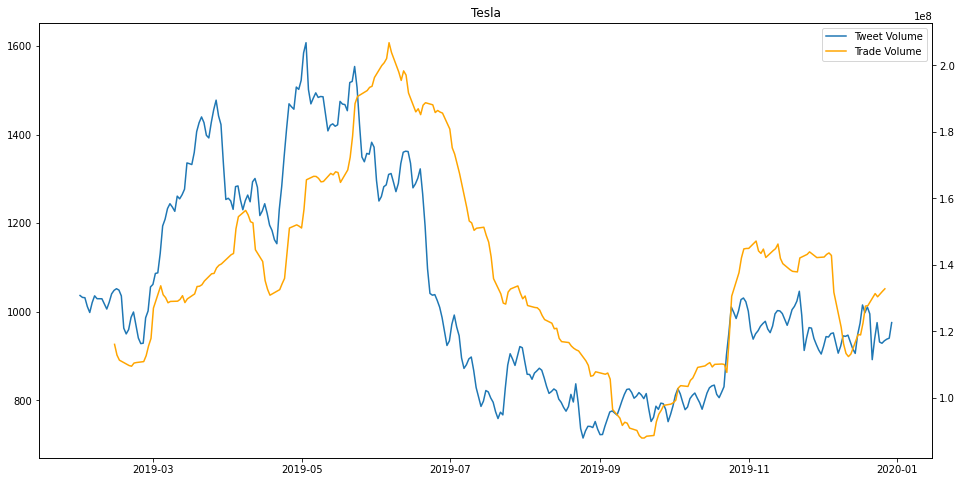

In [46]:
tweet_vol_affect(tsla,tsla_stock,"Tesla")    

<ipython-input-45-3f68544f5c19>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


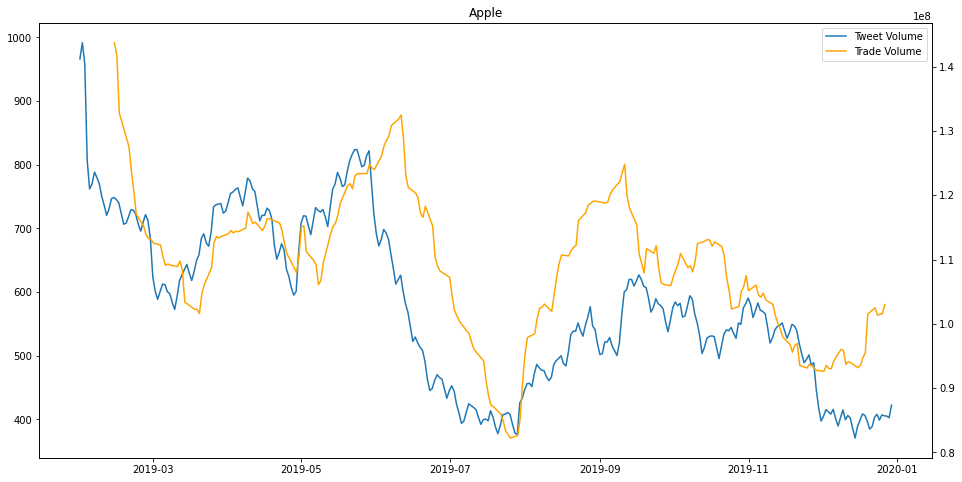

In [47]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

<ipython-input-45-3f68544f5c19>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


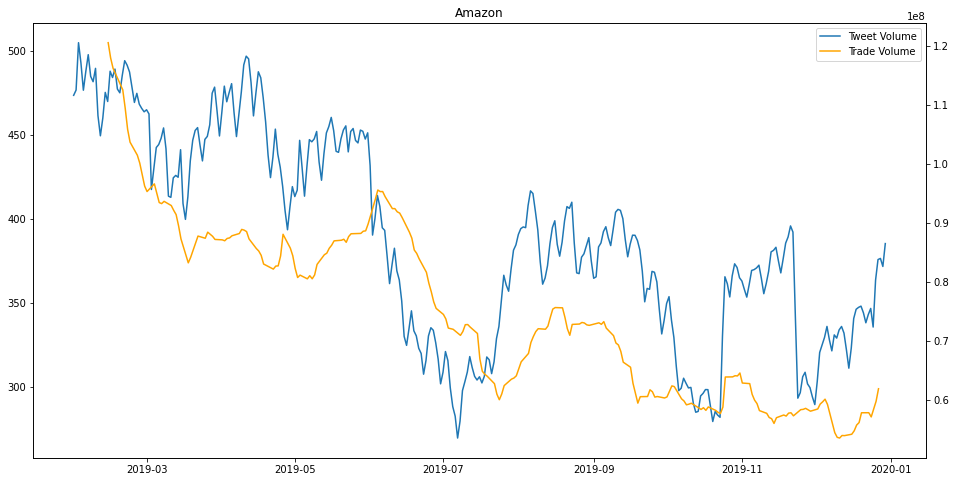

In [48]:
tweet_vol_affect(amzn,amzn_stock,"Amazon")

<ipython-input-45-3f68544f5c19>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


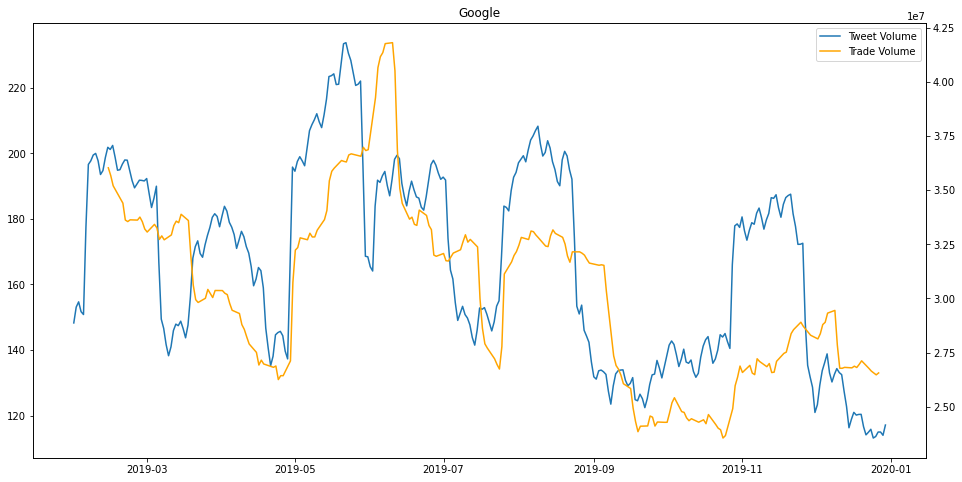

In [49]:
tweet_vol_affect(googl,googl_stock,"Google")

<ipython-input-45-3f68544f5c19>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


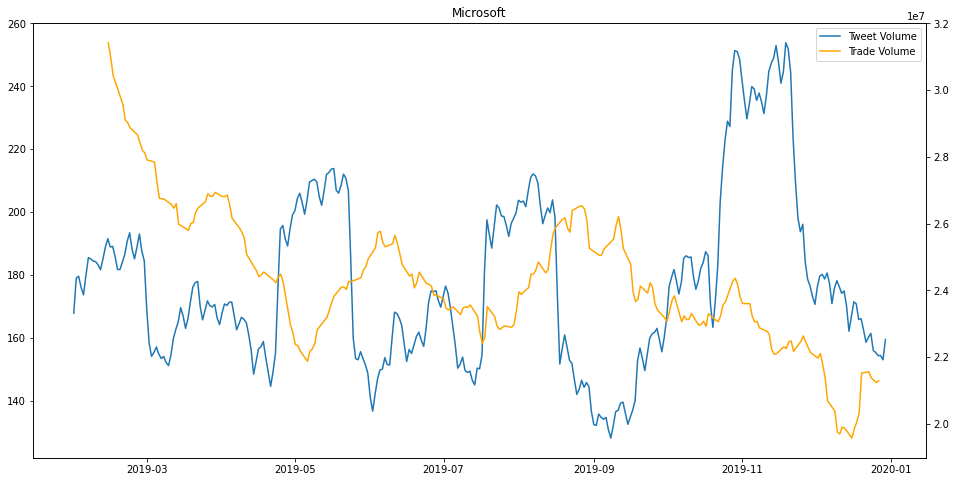

In [50]:
tweet_vol_affect(msft,msft_stock,"Microsoft")

In [30]:
!pip install afinn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53447 sha256=c5d81781da8267787f2ba3888f54851e77e4cd1257e79c402cd577c90a41630b
  Stored in directory: /root/.cache/pip/wheels/f6/6f/c3/b305c5107a17618f2938a067d5ffcbb556909d82398762089e
Successfully built afinn


In [51]:
from afinn import Afinn
afinn = Afinn()

In [52]:
tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
amzn['score'] =  amzn['body'].apply(lambda tweet: afinn.score(tweet))
msft['score'] =  msft['body'].apply(lambda tweet: afinn.score(tweet))
googl['score'] =  googl['body'].apply(lambda tweet: afinn.score(tweet))

<ipython-input-52-0493c20c1d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-52-0493c20c1d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-52-0493c20c1d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [53]:
aapl

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,score
3431146,NaN,2019-01-01 00:12:41,#In2019 I plan to mock the #TrumpTrain relentl...,0,0,0,AAPL,2019-01-01,-9.0
3431147,MacHashNews,2019-01-01 00:13:07,How to upload photos into iCloud Photos from i...,0,0,0,AAPL,2019-01-01,0.0
3431150,permabear_uk,2019-01-01 00:20:55,"$AAPL settled +1.0% at $157.74, and that made ...",0,0,5,AAPL,2019-01-01,-2.0
3431151,AlpacaAlerts,2019-01-01 00:21:01,$AAPL is in Parabolic SAR Breakout winning 60....,0,0,0,AAPL,2019-01-01,4.0
3431156,SunDog8259,2019-01-01 00:24:47,Join @RobinhoodApp and we'll both get a stock ...,0,0,1,AAPL,2019-01-01,4.0
...,...,...,...,...,...,...,...,...,...
4333764,artman1033,2019-12-30 23:50:30,$AAPL ALL TIME HIGH! $293.97 All Time Highest ...,0,1,0,AAPL,2019-12-30,1.0
4333765,Sandro_power,2019-12-30 23:52:35,$AAPL has been a great win for us all year lik...,14,34,37,AAPL,2019-12-30,15.0
4333767,sonycomeback,2019-12-30 23:53:35,The most undervalued global company and brand ...,0,0,0,AAPL,2019-12-30,0.0
4333770,QContrarian,2019-12-30 23:55:37,Discussion of $AAPL and $FB both of which have...,0,0,0,AAPL,2019-12-30,-2.0


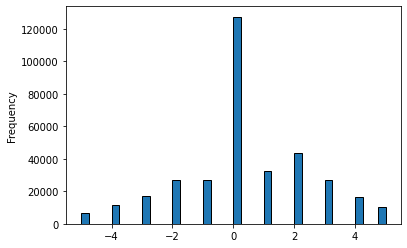

In [54]:
tsla.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

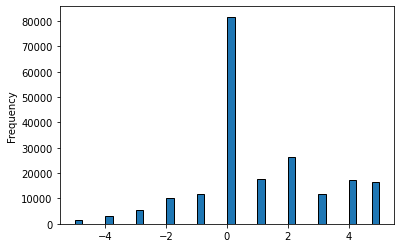

In [55]:
aapl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

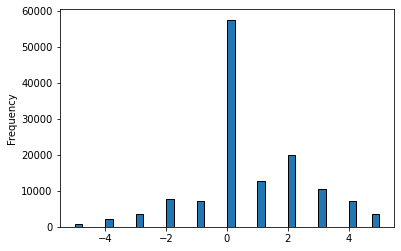

In [56]:
amzn.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

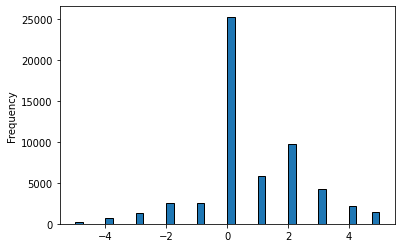

In [57]:
googl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

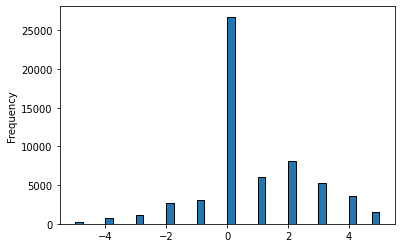

In [58]:
msft.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

In [65]:
def sentiment_overtime(tweets,stock,title):
    visual= tweets.groupby('date')['score'].mean().shift(-1).rolling(30).mean().dropna()

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.plot(visual.index,visual,label='Tweets Sentiment')
    ax2.plot(stock.index,stock['Close'],color='orange',label='share price')
    ax2.set_title("Effects of "+title+" tweets to shareprice")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-65-669cde458562>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


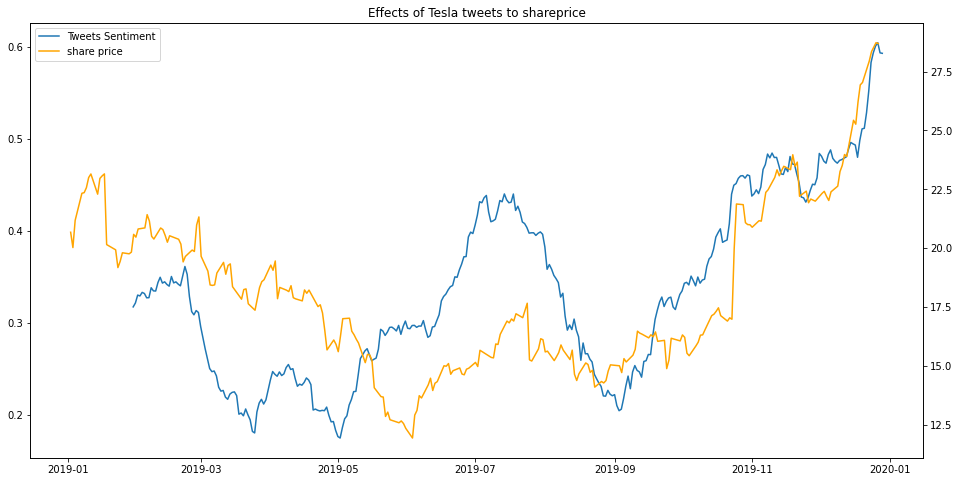

In [66]:
sentiment_overtime(tsla,tsla_stock,"Tesla");

<ipython-input-65-669cde458562>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


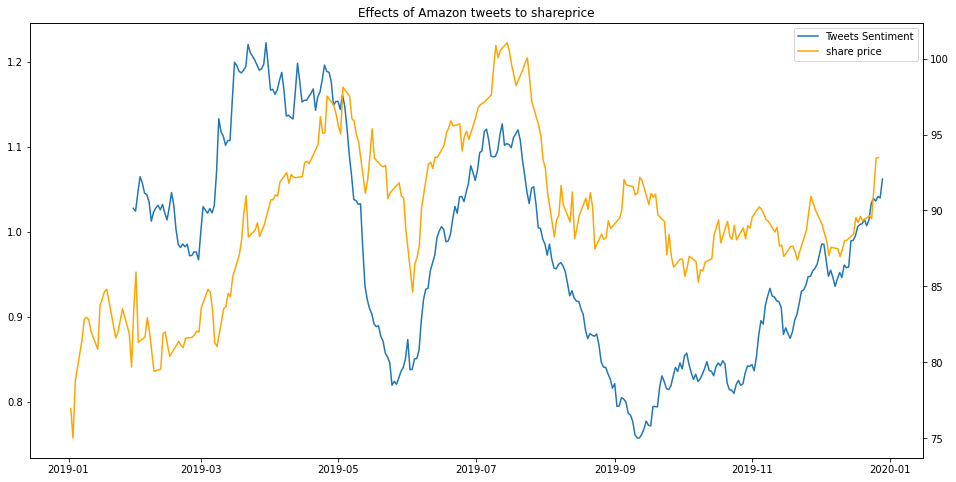

In [67]:
sentiment_overtime(amzn,amzn_stock,"Amazon");

<ipython-input-65-669cde458562>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


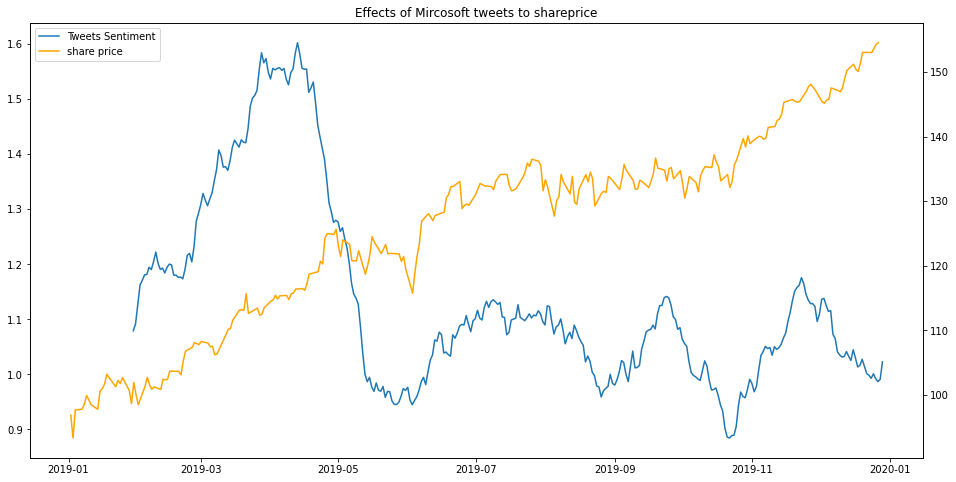

In [68]:
sentiment_overtime(msft,msft_stock,"Mircosoft");

<ipython-input-65-669cde458562>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


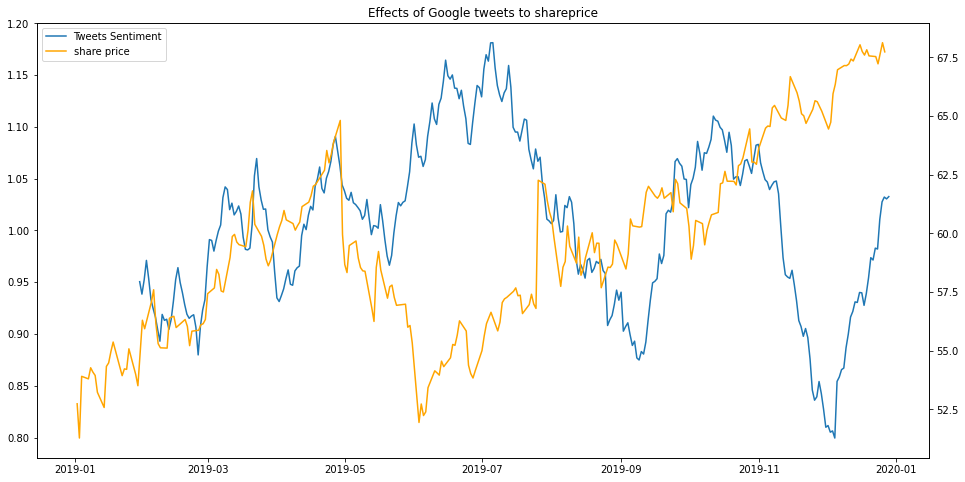

In [69]:
sentiment_overtime(googl,googl_stock,"Google");

<ipython-input-65-669cde458562>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


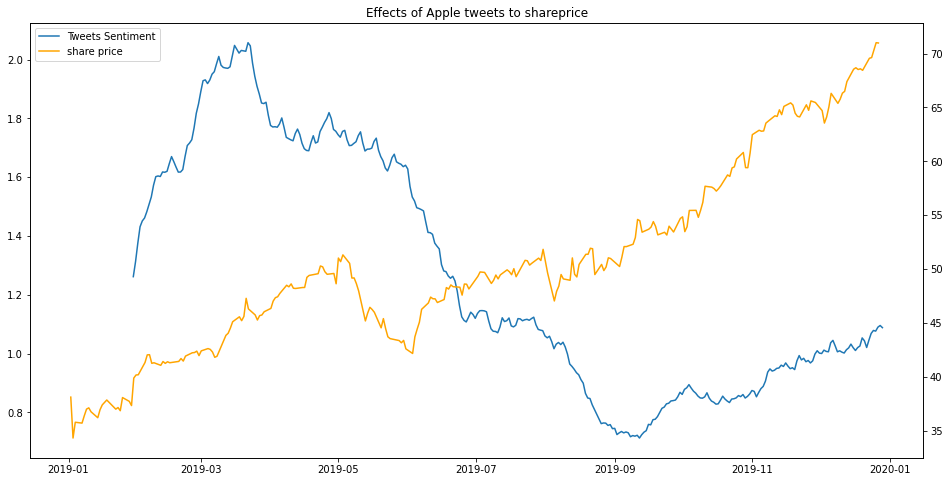

In [70]:
sentiment_overtime(aapl,aapl_stock,"Apple");